<a href="https://www.kaggle.com/code/kedhareswernaidu/netflix-prediction-analysis?scriptVersionId=227385493" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color: #141414; padding: 40px; border-radius: 15px; text-align: center; box-shadow: 0px 8px 12px rgba(0, 0, 0, 0.7); position: relative;">
  <!-- Netflix Logo -->
  <img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg" alt="Netflix Logo" style="width: 220px; margin-bottom: 5px;">

  <!-- Title -->
  <h1 style="color: #d81f26; font-family: 'Helvetica', sans-serif; font-size: 42px; font-weight: bold; letter-spacing: 2px; text-shadow: 3px 3px 6px rgba(0, 0, 0, 0.8); margin-bottom: 20px;">Stock Price Prediction</h1>
</div>

<div style="background-color: #141414; padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0px 6px 10px rgba(0, 0, 0, 0.6);">
  <h2 style="color: #E50914; font-family: 'Helvetica', sans-serif; font-size: 32px; font-weight: bold; letter-spacing: 1.5px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.8); margin: 0;">
    Data Exploration
  </h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import io
from IPython.core.display import display, HTML

/tmp/ipykernel_19/2573979306.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('/kaggle/input/netflix-stock-price/NFLX.csv')

In [4]:
df_styled = df.head().style \
    .background_gradient(cmap="Reds", subset=df.select_dtypes(include='number').columns) \
    .set_table_styles([
        {
            'selector': 'thead', 
            'props': [
                ('background-color', '#d81f26'), 
                ('color', 'white'), 
                ('text-align', 'center'), 
                ('font-size', '16px'), 
                ('font-weight', 'bold'), 
                ('border-bottom', '3px solid #b71c1c')
            ]
        },
        {
            'selector': 'tbody td', 
            'props': [
                ('color', '#f5f5f5'), 
                ('text-align', 'center'), 
                ('border', '1px solid #d81f26'), 
                ('font-size', '14px'), 
                ('background-color', '#141414')
            ]
        }
    ]) \
    .set_properties(
        subset=df.select_dtypes(include='number').columns, 
        **{'font-weight': 'bold', 'font-size': '14px', 'color': '#ffffff'}
    ) \
    .set_caption(
        "<div style='color: #E50914; font-size: 20px; font-weight: bold; text-align: center; background-color: #141414; padding: 10px; border-radius: 10px;'>Netflix Themed: Data Exploration (First 5 Rows)</div>"
    )

df_styled


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [5]:
rows, columns = df.shape

html = f"""
<div style="background-color: #141414; color: #f5f5f5; padding: 10px; text-align: left; border-radius: 10px; box-shadow: 0px 6px 10px rgba(0, 0, 0, 0.7);">
  <h2 style="color: #d81f26; font-family: 'Helvetica', sans-serif; font-size: 28px; font-weight: bold; letter-spacing: 1.5px; margin-bottom: 10px;">
    DataFrame Shape
  </h2>
  <p style="font-family: 'Arial', sans-serif; font-size: 20px; font-weight: bold; margin: 0;">
    Rows: <span style="color: #d81f26;">{rows}</span> &nbsp; | &nbsp; Columns: <span style="color: #d81f26;">{columns}</span>
  </p>
</div>
"""

from IPython.core.display import display, HTML
display(HTML(html))

In [6]:
# Capture df.info() output
buffer = io.StringIO()
df.info(buf=buffer)
info_output = buffer.getvalue()

# Style the captured output
html = f"""
<div style="background-color: #141414; color: #f5f5f5; padding: 20px; border-radius: 10px; text-align: left; box-shadow: 0px 6px 10px rgba(0, 0, 0, 0.7); font-family: 'Arial', sans-serif; font-size: 14px; line-height: 1.6;">
  <h2 style="color: #d81f26; font-family: 'Helvetica', sans-serif; font-size: 24px; font-weight: bold; margin-bottom: 10px;">DataFrame Info</h2>
  <pre style="color: #f5f5f5; background-color: #141414; padding: 10px; border: 1px solid #d81f26; border-radius: 5px;">{info_output}</pre>
</div>
"""

# Display the styled output
display(HTML(html))

In [7]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format

In [8]:
df_styled = df.head().style \
    .background_gradient(cmap="Reds", subset=df.select_dtypes(include='number').columns) \
    .set_table_styles([
        {
            'selector': 'thead', 
            'props': [
                ('background-color', '#d81f26'), 
                ('color', 'white'), 
                ('text-align', 'center'), 
                ('font-size', '16px'), 
                ('font-weight', 'bold'), 
                ('border-bottom', '3px solid #b71c1c')
            ]
        },
        {
            'selector': 'tbody td', 
            'props': [
                ('color', '#f5f5f5'), 
                ('text-align', 'center'), 
                ('border', '1px solid #d81f26'), 
                ('font-size', '14px'), 
                ('background-color', '#141414')
            ]
        }
    ]) \
    .set_properties(
        subset=df.select_dtypes(include='number').columns, 
        **{'font-weight': 'bold', 'font-size': '14px', 'color': '#ffffff'}
    ) \
    .set_caption(
        "<div style='color: #E50914; font-size: 20px; font-weight: bold; text-align: center; background-color: #141414; padding: 10px; border-radius: 10px;'>Netflix Themed: Data Exploration (First 5 Rows)</div>"
    )

df_styled


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23 00:00:00,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24 00:00:00,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28 00:00:00,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29 00:00:00,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30 00:00:00,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [9]:
# Transpose and describe the DataFrame
describe_transposed = df.describe().T

# Stylish Netflix Theme
df_styled = describe_transposed.style \
    .background_gradient(cmap="Reds", subset=describe_transposed.select_dtypes(include='number').columns) \
    .set_table_styles([
        # Header styles
        {
            'selector': 'thead', 
            'props': [
                ('background-color', '#d81f26'), 
                ('color', 'white'), 
                ('text-align', 'center'), 
                ('font-size', '18px'), 
                ('font-weight', 'bold'), 
                ('border-bottom', '4px solid #a61919')  # Darker border for dramatic header
            ]
        },
        # Body styles
        {
            'selector': 'tbody td', 
            'props': [
                ('color', '#f5f5f5'), 
                ('text-align', 'left'), 
                ('font-size', '14px'), 
                ('padding', '8px'), 
                ('border', '1px solid #d81f26'), 
                ('background-color', '#141414')  # Signature black background for cells
            ]
        }
    ]) \
    .set_properties(
        subset=describe_transposed.select_dtypes(include='number').columns, 
        **{'font-weight': 'bold', 'color': '#ffffff'}
    ) \
    .set_caption(
        "<div style='color: #E50914; font-size: 22px; font-weight: bold; text-align: center; background-color: #141414; padding: 10px; border-radius: 10px;'>Netflix-Themed: Transposed Data Description</div>"
    )

# Display styled DataFrame
df_styled

,count,mean,min,25%,50%,75%,max,std
Date,5422,2013-02-26 23:14:19.166359296,2002-05-23 00:00:00,2007-10-10 06:00:00,2013-02-28 12:00:00,2018-07-17 18:00:00,2023-12-05 00:00:00,nan
Open,5422.000000,131.304057,0.377857,4.107500,33.700714,244.832497,692.349976,172.967612
High,5422.000000,133.340057,0.410714,4.183214,34.275714,250.257496,700.989990,175.451082
Low,5422.000000,129.201970,0.346429,4.031786,33.237858,237.687497,686.090027,170.335958
Close,5422.000000,131.322955,0.372857,4.112857,33.833570,245.152500,691.690002,172.929156
Adj Close,5422.000000,131.322955,0.372857,4.112857,33.833570,245.152500,691.690002,172.929156
Volume,5422.000000,15944545.628919,285600.000000,5960725.000000,10062500.000000,18869300.000000,323414000.000000,18741969.818380


<div style="background-color: #141414; padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0px 6px 10px rgba(0, 0, 0, 0.6);">
  <h2 style="color: #E50914; font-family: 'Helvetica', sans-serif; font-size: 32px; font-weight: bold; letter-spacing: 1.5px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.8); margin: 0;">
    Data Cleaning
  </h2>
</div>

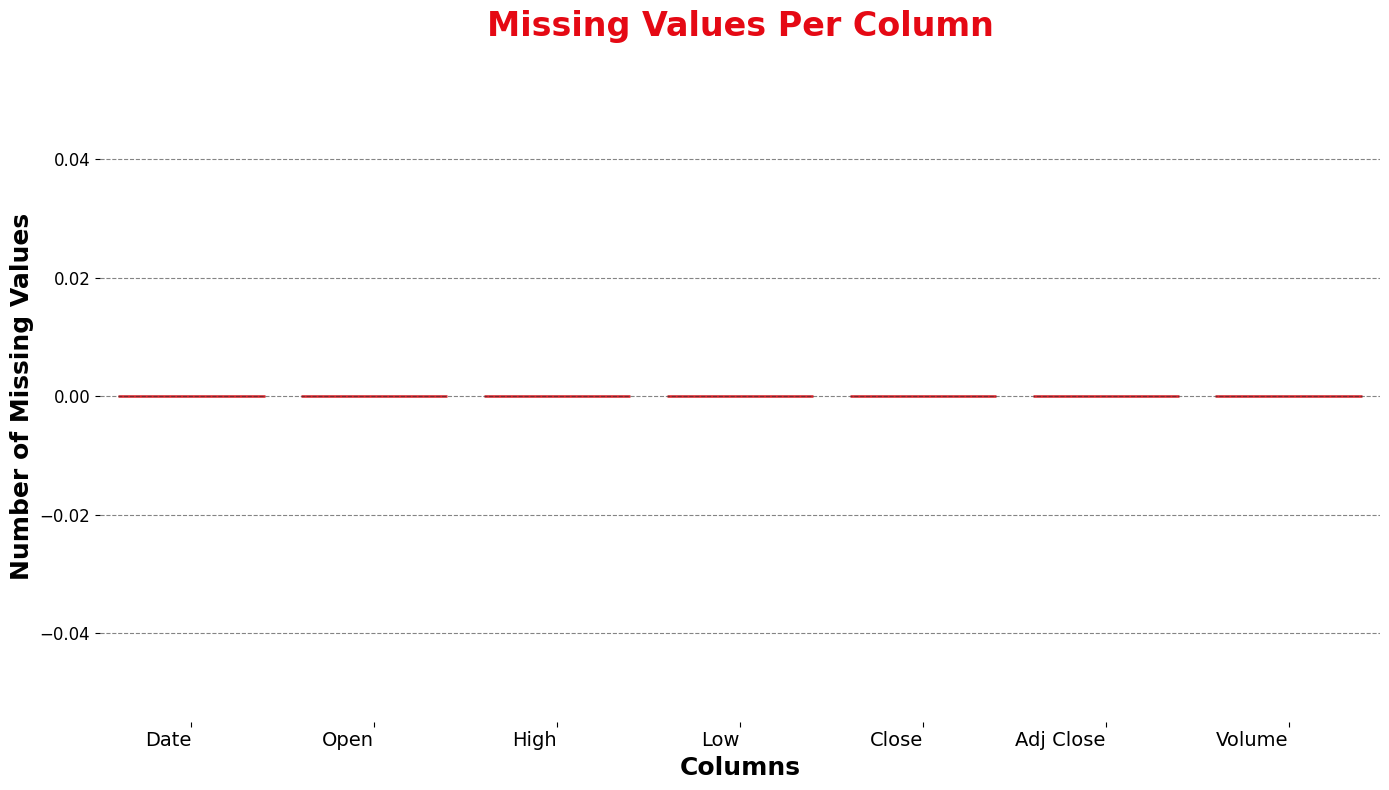

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace with your actual DataFrame)
# df = Your DataFrame
null_counts = df.isnull().sum()

# Create the bar plot with Netflix styling
plt.figure(figsize=(14, 8))
bars = sns.barplot(
    x=null_counts.index, y=null_counts.values, 
    palette=['#d81f26' if v > 0 else '#1a1a1a' for v in null_counts.values]
)

# Add annotations on bars for missing values
for bar, value in zip(bars.patches, null_counts.values):
    if value > 0:  # Only annotate bars with missing values
        bars.annotate(
            f'{value}',
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='bottom',
            fontsize=12, color='#FFFFFF', fontweight='bold', xytext=(0, 5),
            textcoords='offset points'
        )

# Customize the plot
plt.title(
    'Missing Values Per Column', 
    fontsize=24, fontweight='bold', color='#E50914', pad=25
)
plt.xlabel('Columns', fontsize=18, fontweight='bold')
plt.ylabel('Number of Missing Values', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, ha='right')
plt.yticks(fontsize=12)
plt.gca().set_facecolor('#141414')  # Netflix black background
plt.grid(axis='y', linestyle='--', linewidth=0.8, color='#333333', alpha=0.6)
plt.box(False)  # Remove plot frame for a cleaner look

# Enhance bar aesthetics
for bar in bars.patches:
    bar.set_edgecolor('#d81f26')  # Netflix red borders for bars
    bar.set_linewidth(1.8)  # Thicker borders for more emphasis

# Display the plot
plt.tight_layout()
plt.show()

### Visualization

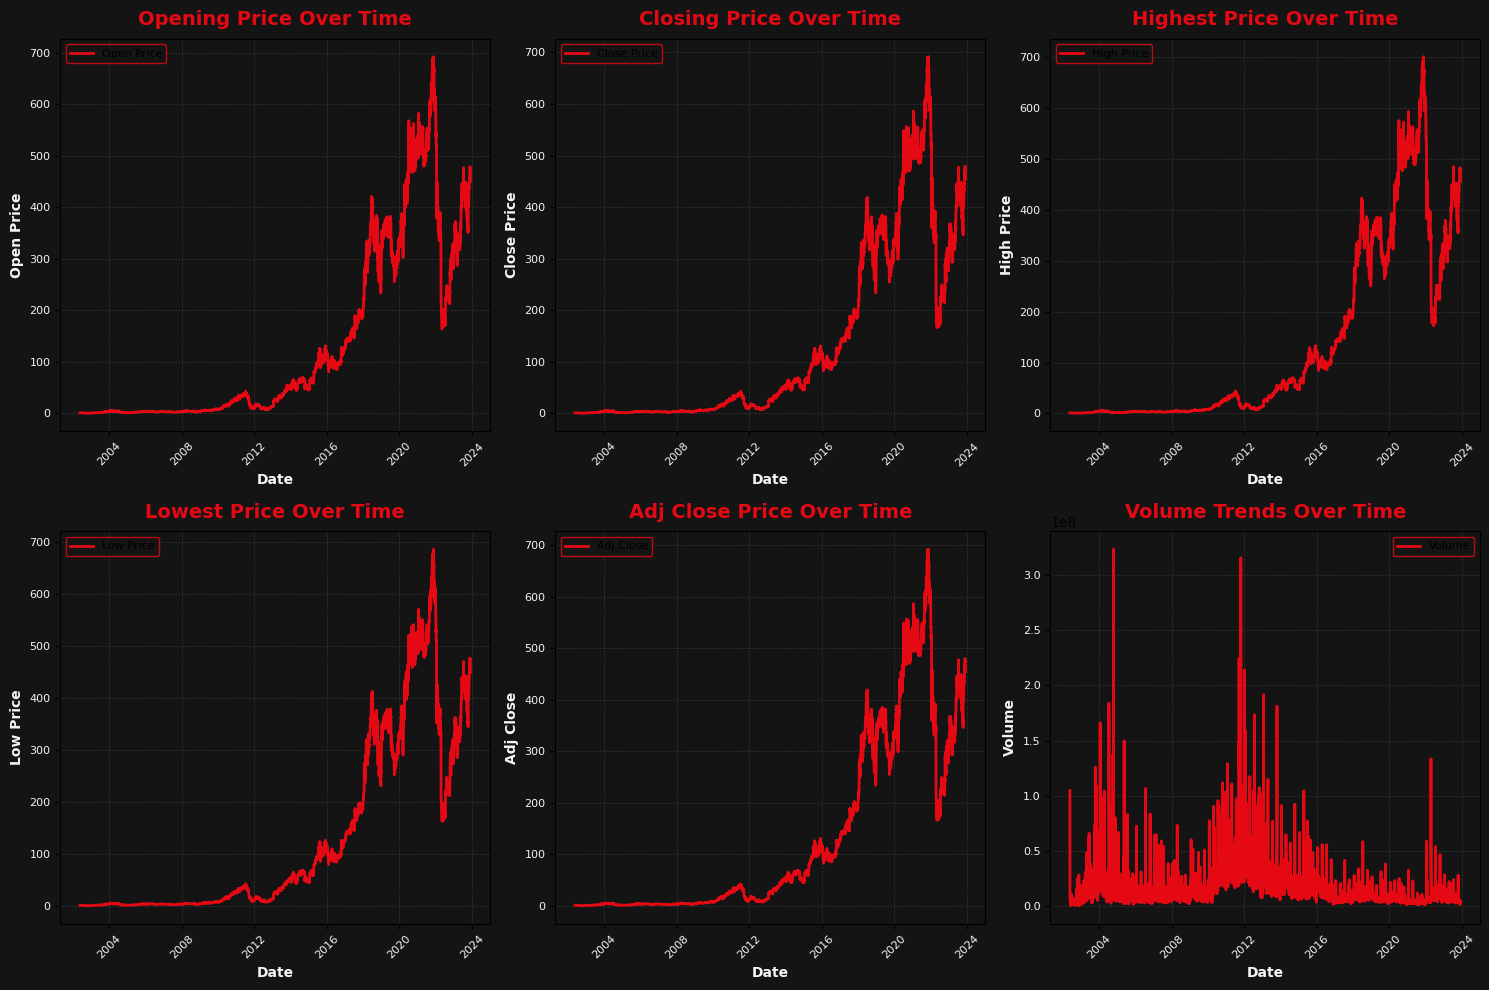

In [11]:
import matplotlib.pyplot as plt

# Define consistent Netflix red color
plot_color = '#E50914'
background_color = '#141414'
label_color = '#F5F5F5'
grid_color = '#333333'

plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.plot(df['Date'], df['Open'], color=plot_color, linewidth=2)
plt.title('Opening Price Over Time', fontsize=14, fontweight='bold', color=plot_color, pad=10)
plt.xlabel('Date', fontsize=10, fontweight='bold', color=label_color)
plt.ylabel('Open Price', fontsize=10, fontweight='bold', color=label_color)
plt.legend(['Open Price'], loc='best', fontsize=8, facecolor=background_color, edgecolor=plot_color)
plt.grid(color=grid_color, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor(background_color)
plt.xticks(color=label_color, fontsize=8, rotation=45)
plt.yticks(color=label_color, fontsize=8)

plt.subplot(232)
plt.plot(df['Date'], df['Close'], color=plot_color, linewidth=2)
plt.title('Closing Price Over Time', fontsize=14, fontweight='bold', color=plot_color, pad=10)
plt.xlabel('Date', fontsize=10, fontweight='bold', color=label_color)
plt.ylabel('Close Price', fontsize=10, fontweight='bold', color=label_color)
plt.legend(['Close Price'], loc='best', fontsize=8, facecolor=background_color, edgecolor=plot_color)
plt.grid(color=grid_color, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor(background_color)
plt.xticks(color=label_color, fontsize=8, rotation=45)
plt.yticks(color=label_color, fontsize=8)

plt.subplot(233)
plt.plot(df['Date'], df['High'], color=plot_color, linewidth=2)
plt.title('Highest Price Over Time', fontsize=14, fontweight='bold', color=plot_color, pad=10)
plt.xlabel('Date', fontsize=10, fontweight='bold', color=label_color)
plt.ylabel('High Price', fontsize=10, fontweight='bold', color=label_color)
plt.legend(['High Price'], loc='best', fontsize=8, facecolor=background_color, edgecolor=plot_color)
plt.grid(color=grid_color, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor(background_color)
plt.xticks(color=label_color, fontsize=8, rotation=45)
plt.yticks(color=label_color, fontsize=8)

plt.subplot(234)
plt.plot(df['Date'], df['Low'], color=plot_color, linewidth=2)
plt.title('Lowest Price Over Time', fontsize=14, fontweight='bold', color=plot_color, pad=10)
plt.xlabel('Date', fontsize=10, fontweight='bold', color=label_color)
plt.ylabel('Low Price', fontsize=10, fontweight='bold', color=label_color)
plt.legend(['Low Price'], loc='best', fontsize=8, facecolor=background_color, edgecolor=plot_color)
plt.grid(color=grid_color, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor(background_color)
plt.xticks(color=label_color, fontsize=8, rotation=45)
plt.yticks(color=label_color, fontsize=8)

plt.subplot(235)
plt.plot(df['Date'], df['Adj Close'], color=plot_color, linewidth=2)
plt.title('Adj Close Price Over Time', fontsize=14, fontweight='bold', color=plot_color, pad=10)
plt.xlabel('Date', fontsize=10, fontweight='bold', color=label_color)
plt.ylabel('Adj Close', fontsize=10, fontweight='bold', color=label_color)
plt.legend(['Adj Close'], loc='best', fontsize=8, facecolor=background_color, edgecolor=plot_color)
plt.grid(color=grid_color, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor(background_color)
plt.xticks(color=label_color, fontsize=8, rotation=45)
plt.yticks(color=label_color, fontsize=8)

plt.subplot(236)
plt.plot(df['Date'], df['Volume'], color=plot_color, linewidth=2)
plt.title('Volume Trends Over Time', fontsize=14, fontweight='bold', color=plot_color, pad=10)
plt.xlabel('Date', fontsize=10, fontweight='bold', color=label_color)
plt.ylabel('Volume', fontsize=10, fontweight='bold', color=label_color)
plt.legend(['Volume'], loc='best', fontsize=8, facecolor=background_color, edgecolor=plot_color)
plt.grid(color=grid_color, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor(background_color)
plt.xticks(color=label_color, fontsize=8, rotation=45)
plt.yticks(color=label_color, fontsize=8)

plt.tight_layout()
plt.gcf().set_facecolor(background_color)
plt.show()

## Data Modeling

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(['Date', 'Close'], axis=1)
y = df['Close']

In [13]:
from sklearn.impute import SimpleImputer
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [15]:
# Initialize Linear Regression model
model = LinearRegression()

In [16]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [18]:
y_pred

array([319.299988, 361.480011,  47.774284, ...,   7.675714, 299.109985,
       424.98999 ])

## Performance Analysis

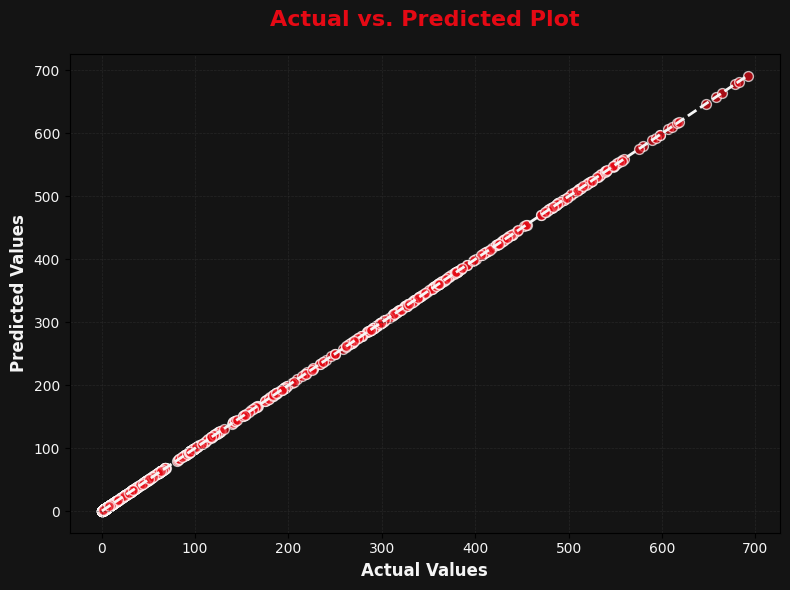

In [19]:
# Define consistent Netflix-themed colors
scatter_color = '#E50914'  # Netflix red
line_color = '#F5F5F5'     # Light gray for the diagonal line
background_color = '#141414'  # Netflix black
label_color = '#F5F5F5'     # Text color for labels

# Create the styled scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color=scatter_color, alpha=0.7, edgecolor='#FFFFFF', s=50)  # Scatter points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color=line_color, linewidth=2)  # Diagonal line

# Title and labels
plt.title('Actual vs. Predicted Plot', fontsize=16, fontweight='bold', color=scatter_color, pad=20)
plt.xlabel('Actual Values', fontsize=12, fontweight='bold', color=label_color)
plt.ylabel('Predicted Values', fontsize=12, fontweight='bold', color=label_color)

# Ticks and background
plt.xticks(fontsize=10, color=label_color)
plt.yticks(fontsize=10, color=label_color)
plt.gca().set_facecolor(background_color)  # Set plot background to black
plt.gcf().set_facecolor(background_color)  # Set figure background to black
plt.grid(color='#333333', linestyle='--', linewidth=0.5, alpha=0.6)  # Subtle grid

# Tight layout and display
plt.tight_layout()
plt.show()

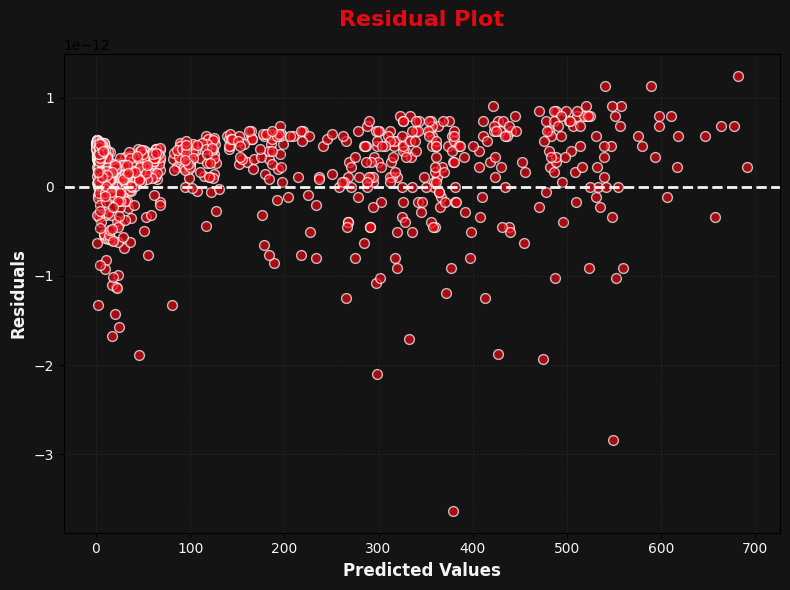

In [20]:
import matplotlib.pyplot as plt

# Define Netflix-themed colors
scatter_color = '#E50914'  # Netflix red for scatter points
line_color = '#F5F5F5'     # Light gray for the horizontal line
background_color = '#141414'  # Netflix black
label_color = '#F5F5F5'     # Text color for labels
grid_color = '#333333'      # Grid color

# Calculate residuals
residuals = y_test - y_pred

# Create the styled Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color=scatter_color, alpha=0.7, edgecolor='#FFFFFF', s=50)
plt.axhline(y=0, color=line_color, linestyle='--', linewidth=2)

# Title and labels
plt.title('Residual Plot', fontsize=16, fontweight='bold', color=scatter_color, pad=20)
plt.xlabel('Predicted Values', fontsize=12, fontweight='bold', color=label_color)
plt.ylabel('Residuals', fontsize=12, fontweight='bold', color=label_color)

# Ticks and background
plt.xticks(fontsize=10, color=label_color)
plt.yticks(fontsize=10, color=label_color)
plt.gca().set_facecolor(background_color)
plt.gcf().set_facecolor(background_color)
plt.grid(color=grid_color, linestyle='--', linewidth=0.5, alpha=0.6)

# Layout and display
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared on the test set: {r2}')


R-squared on the test set: 1.0


In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')

Mean Squared Error on the test set: 2.2511603475967533e-25


R-squared (R2 Score):

An R-squared value of 1.0 means that your model perfectly predicts the variation in the dependent variable based on the independent variables. It suggests that the model explains 100% of the variability in the target variable, which is highly unusual and might be indicative of overfitting.
While a high R-squared value is generally desirable, a value of 1.0 could also signal overfitting to the training data. It's essential to ensure that the model generalizes well to new, unseen data.

Mean Squared Error (MSE):

An MSE close to zero indicates that the predicted values are very close to the true values in the test set. In fact, the value is very close to zero and is essentially a negligible error.

A low MSE is desirable, but again, extreme values may indicate potential overfitting or other issues.

In [23]:
model.score(X_test,y_test)

1.0